# Introduction

This notebook is just for visualization EDA on the Twitter sentiment data found [here](https://data.world/crowdflower/brands-and-product-emotions). Nothing too fancy.

In [1]:
import pandas as pd
pd.set_option("max_columns", None)

import numpy as np
np.random.seed(0)

import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

import re

import string

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

# Load Data

In [2]:
df = pd.read_csv('data/judge_1377884607_tweet_product_company.csv')
df.rename(columns={'tweet_text' : 'text',
                   'is_there_an_emotion_directed_at_a_brand_or_product' : 'emotion',
                   'emotion_in_tweet_is_directed_at' : 'directed_at'},
          inplace=True)
df.dropna(subset = ['text'], inplace = True)
df.head()

,text,directed_at,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


## Cleaned, Tokenized DataFrame

In [3]:
def basic_clean(text):
    stop_words = stopwords.words("english")
    
    text = re.sub('@\S+', '', text)
    text = re.sub('http\S+', '', text)
    text = re.sub('#\S+', '', text)
    for i in string.punctuation:
        text = text.replace(i, '').lower()
    
    tokens = nltk.word_tokenize(text)
    new_tokens = []
    for token in tokens:
        if token.lower() not in stop_words:
            new_tokens.append(token)
            
    return new_tokens

In [4]:
df_clean = df.copy()

In [5]:
for i in range(len(df_clean)):
    df_clean.iloc[i].text = basic_clean(df_clean.iloc[i].text)

In [6]:
df_clean.head()

,text,directed_at,emotion
0,"[3g, iphone, 3, hrs, tweeting, dead, need, upg...",iPhone,Negative emotion
1,"[know, awesome, ipadiphone, app, youll, likely...",iPad or iPhone App,Positive emotion
2,"[wait, 2, also, sale]",iPad,Positive emotion
3,"[hope, years, festival, isnt, crashy, years, i...",iPad or iPhone App,Negative emotion
4,"[great, stuff, fri, marissa, mayer, google, ti...",Google,Positive emotion


# Random EDA

## Class Imbalance Prob

In [7]:
df_clean.emotion.value_counts()

No emotion toward brand or product    5155
Positive emotion                      2869
Negative emotion                       545
I can't tell                           151
Name: emotion, dtype: int64

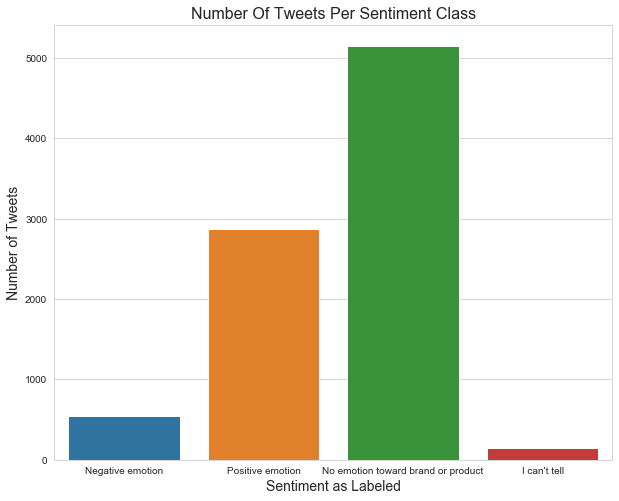

In [8]:
plt.figure(figsize=(10,8))
sns.countplot(df_clean.emotion)
plt.ylabel("Number of Tweets", fontsize=14)
plt.xlabel("Sentiment as Labeled", fontsize=14)
plt.title("Number Of Tweets Per Sentiment Class", fontsize=16);

## Emotion By Direction At

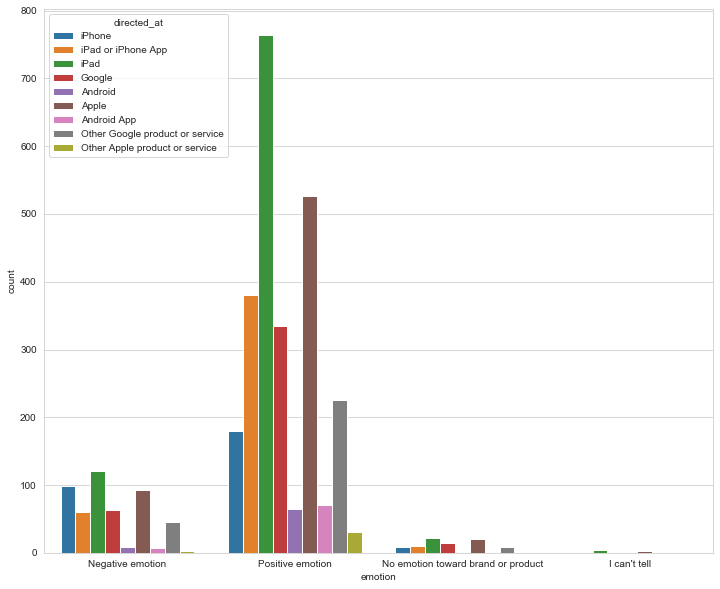

In [9]:
plt.figure(figsize=(12,10))
sns.countplot(df_clean.emotion, hue=df.directed_at);

## Examples

In [10]:
for i in (0, 1, 16):
    print(df.text[i], "\n")
    print(df_clean.text[i], "\n")
    print(df.emotion[i])
    print("\n ============================= \n")

.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW. 

['3g', 'iphone', '3', 'hrs', 'tweeting', 'dead', 'need', 'upgrade', 'plugin', 'stations'] 

Negative emotion


@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW 

['know', 'awesome', 'ipadiphone', 'app', 'youll', 'likely', 'appreciate', 'design', 'also', 'theyre', 'giving', 'free', 'ts'] 

Positive emotion


Holler Gram for iPad on the iTunes App Store -  http://t.co/kfN3f5Q (via @marc_is_ken) #sxsw 

['holler', 'gram', 'ipad', 'itunes', 'app', 'store', 'via'] 

No emotion toward brand or product


